In [1]:
import pandas as pd
from scipy import stats

/Users/minhtran/Documents/WORK/training/minhtran/data-learning/kedro/env-kedro/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
df = catalog.load("plant_growths")
df

2021-01-06 09:41:46,372 - kedro.io.data_catalog - INFO - Loading data from `plant_growths` (CSVDataSet)...


,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


/Users/minhtran/Documents/WORK/training/minhtran/data-learning/kedro/env-kedro/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:title={'center':'weight'}, xlabel='group'>

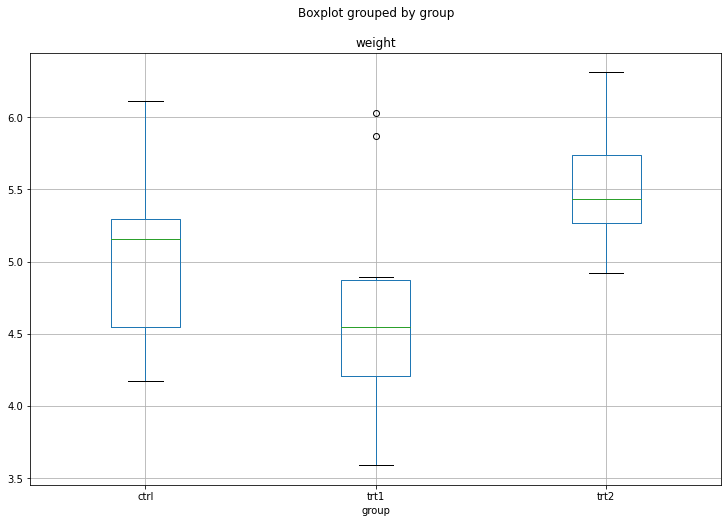

In [8]:
# create a boxplot
df.boxplot('weight', by='group', figsize=(12, 8))


In [10]:
ctrl = df.weight[df.group == 'ctrl']
ctrl

0    4.17
1    5.58
2    5.18
3    6.11
4    4.50
5    4.61
6    5.17
7    4.53
8    5.33
9    5.14
Name: weight, dtype: float64

In [11]:
grps = pd.unique(df.group.values)
grps

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [13]:
d_df = {grp:df['weight'][df.group == grp] for grp in grps}
d_df

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64,
 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64,
 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [22]:
k = len(pd.unique(df.group))
N = len(df.values)
n = df.groupby('group').size()[0]

In [23]:
F, p = stats.f_oneway(d_df['ctrl'], d_df['trt1'], d_df['trt2'])

In [24]:
F


4.846087862380136

In [25]:
p

0.0159099583256229